<a href="https://colab.research.google.com/github/chinmay10cm/Employee_Data_Analysis/blob/main/Employee_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  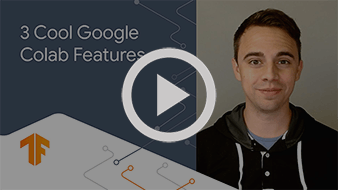
  </a>
</center>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/employee_promotion.csv")

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [ ]:
df.drop(columns=['employee_id'],inplace=True)

In [ ]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
num_features=[i for i in df.columns if df.dtypes[i]!='object']

In [ ]:
num_features

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'awards_won',
 'avg_training_score',
 'is_promoted']

In [ ]:
cat_features=[i for i in df.columns if df.dtypes[i]=='object' ]

In [ ]:
print(cat_features)

['department', 'region', 'education', 'gender', 'recruitment_channel']


In [ ]:
df[cat_features].nunique()

department              9
region                 34
education               3
gender                  2
recruitment_channel     3
dtype: int64

no_of_trainings


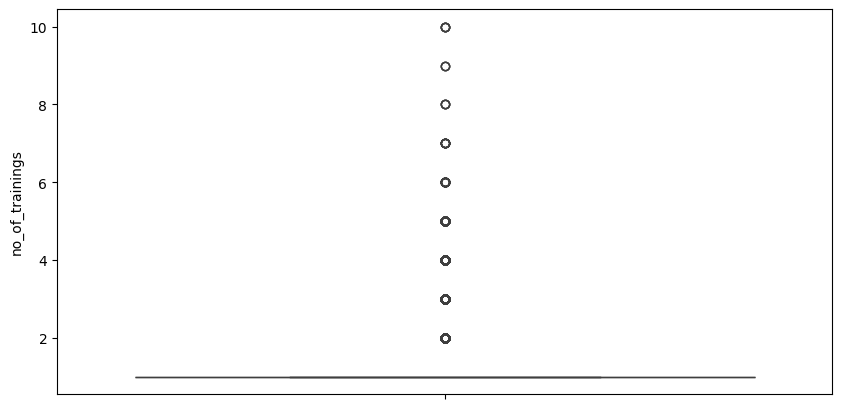

age


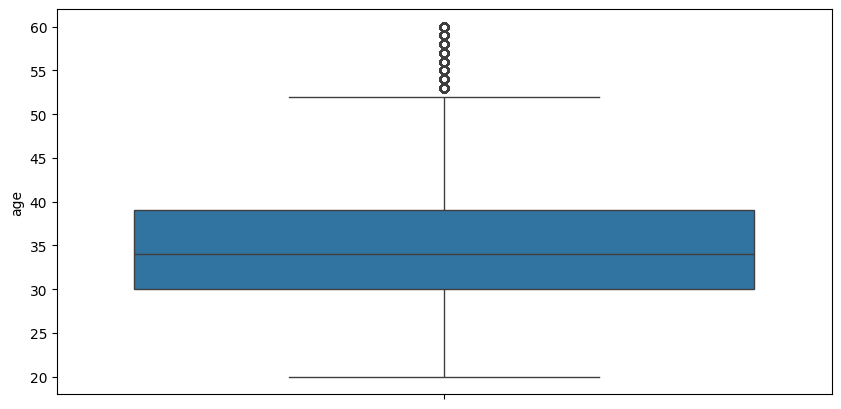

previous_year_rating


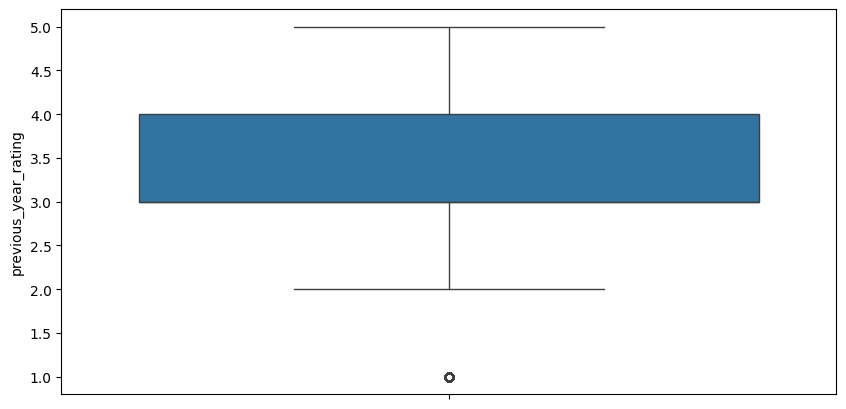

length_of_service


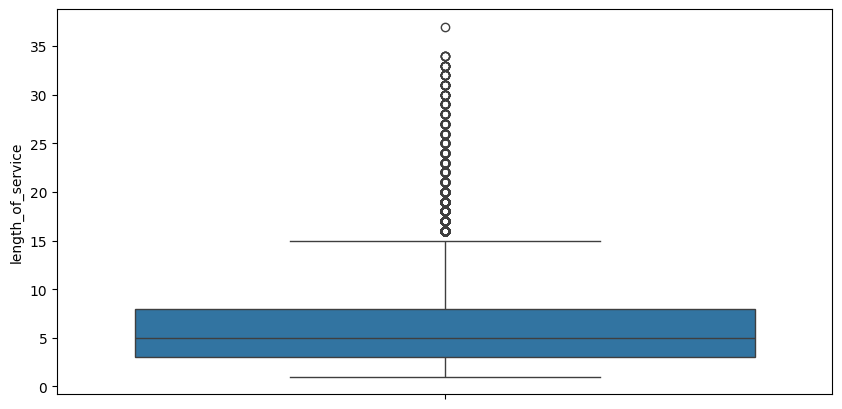

awards_won


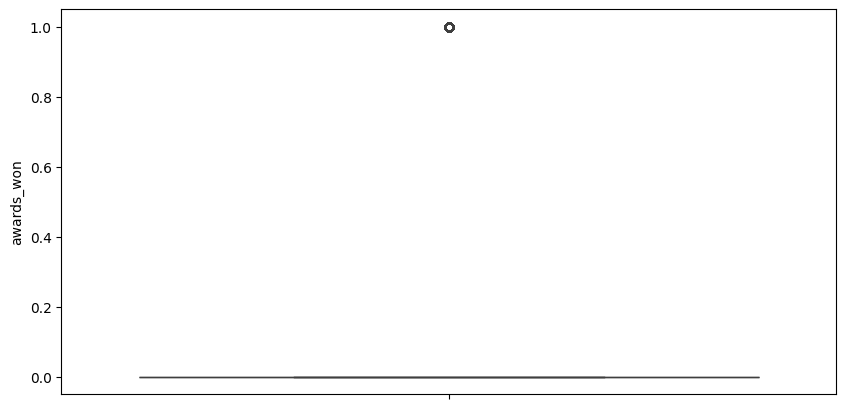

avg_training_score


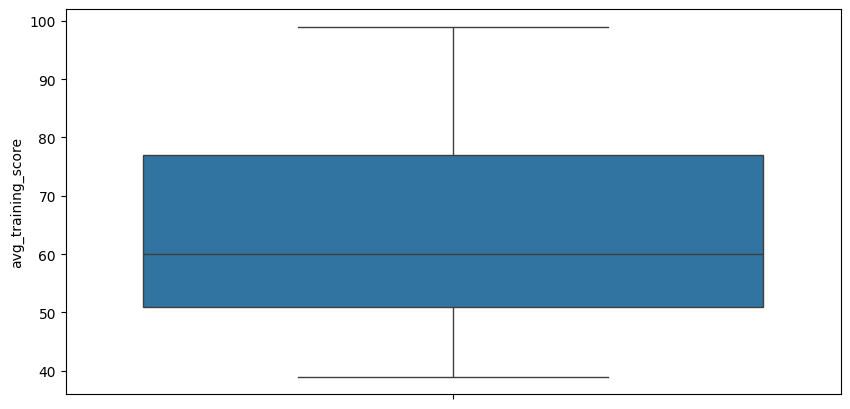

is_promoted


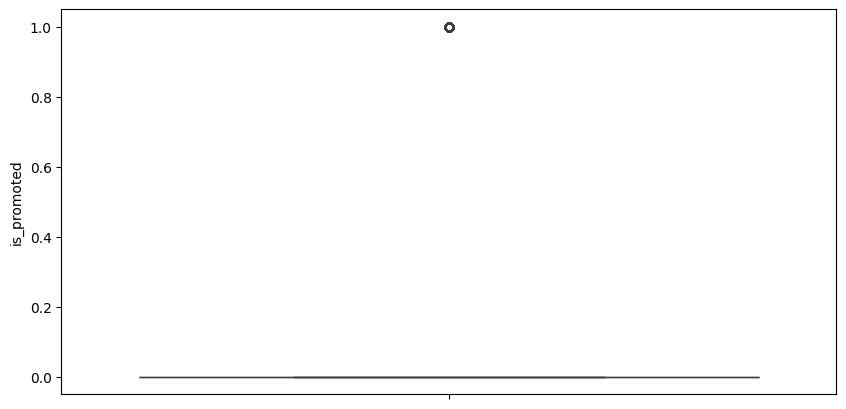

In [ ]:
for i in num_features:
    plt.figure(figsize=(10, 5))

    sns.boxplot(y=df[i])
    print(i)
    plt.show()

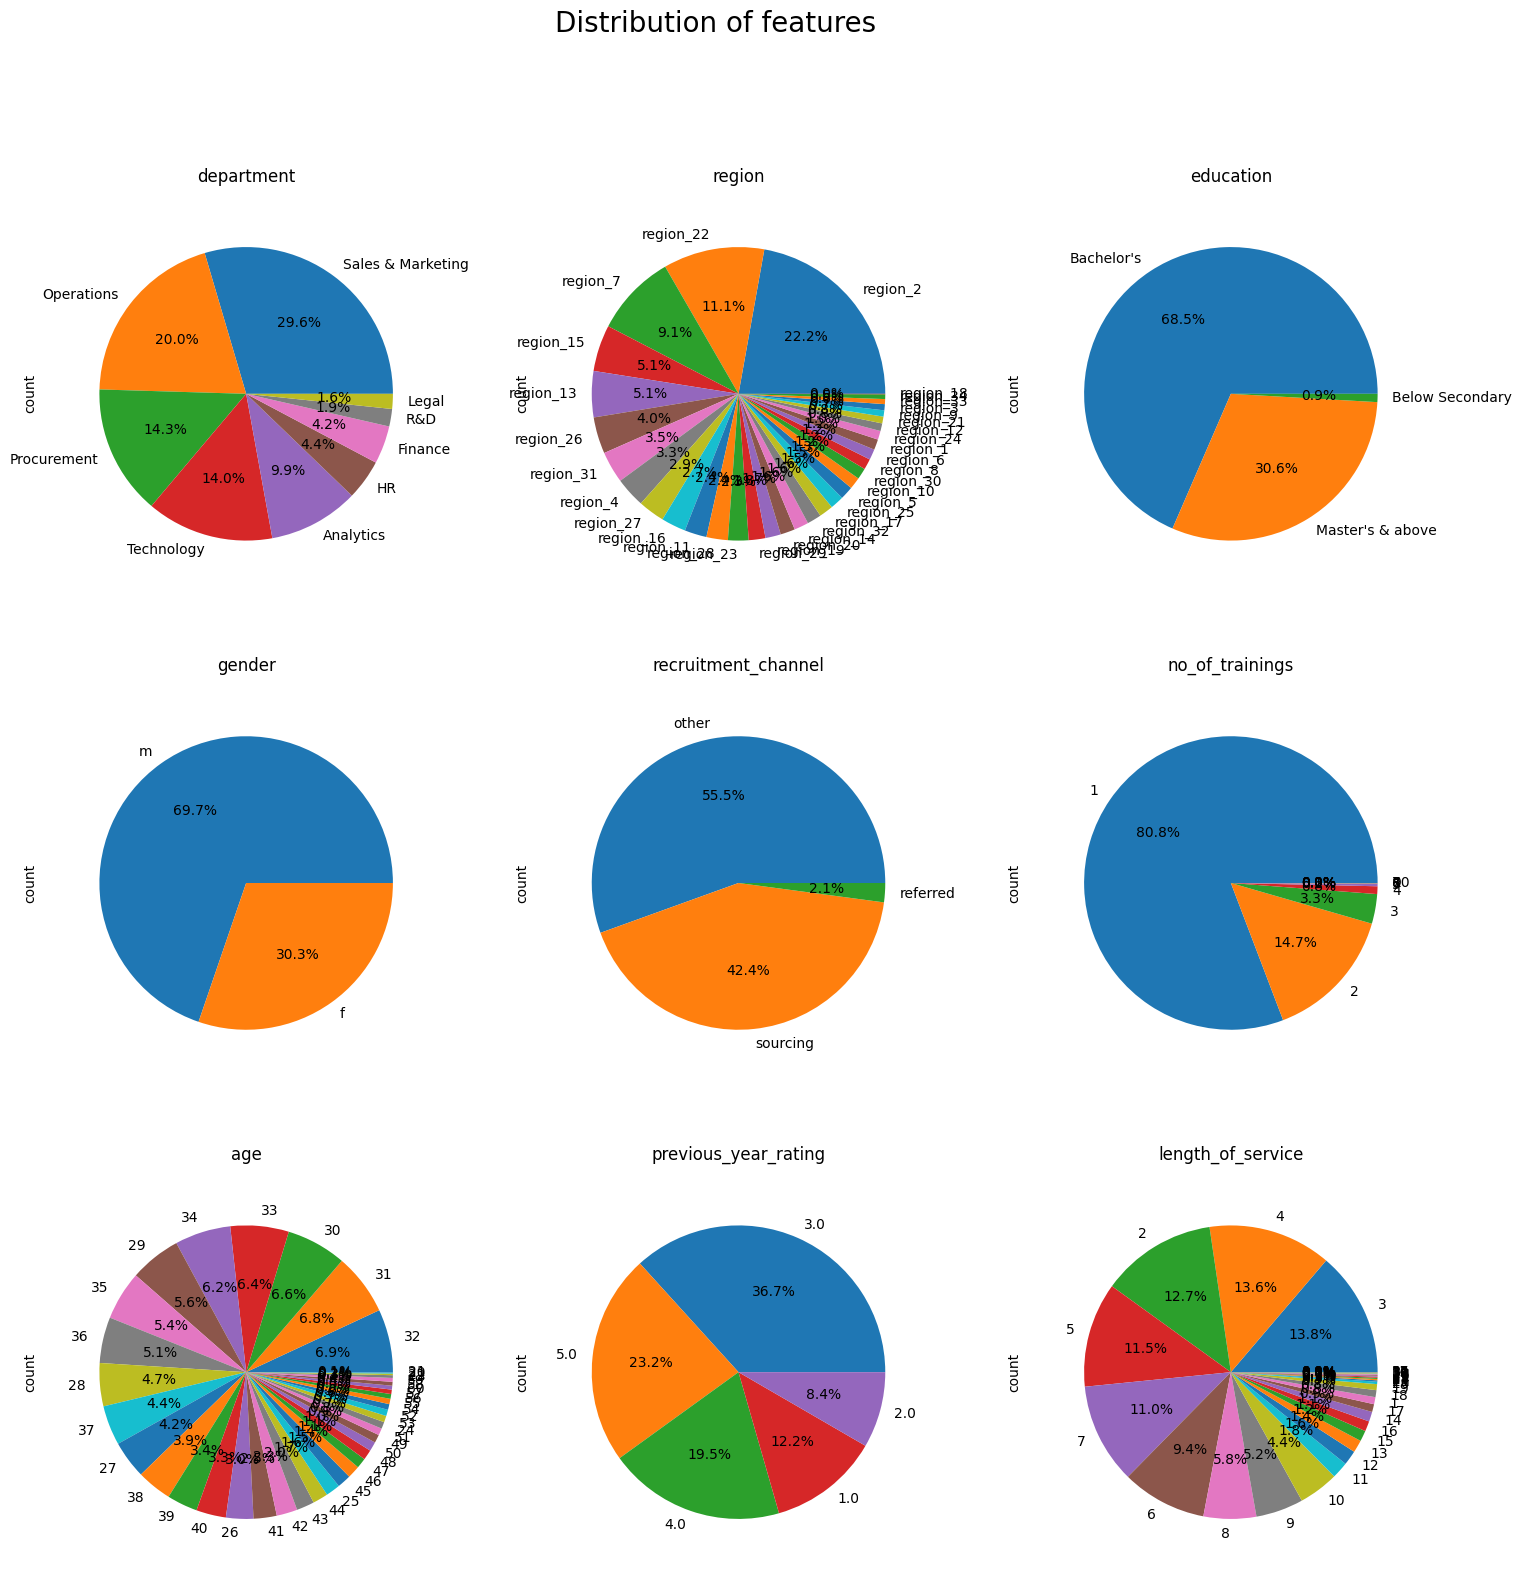

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots with a 3x3 grid and larger figsize
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Loop through the first 9 columns of your DataFrame
for i, feature in enumerate(df.columns[:9]):
    row = i // 3
    col = i % 3

    # Plot a pie chart for the distribution of values for each feature
    pd.value_counts(df[feature]).plot.pie(autopct="%.1f%%", ax=axs[row][col],
                                          radius=0.9)  # Adjust the radius
    axs[row][col].set_title(feature)  # Set title for the subplot

# Set a super title for the entire figure
plt.suptitle("Distribution of features", fontsize=20)

# Adjust the layout and spacing of subplots


# Display the figure
plt.show()

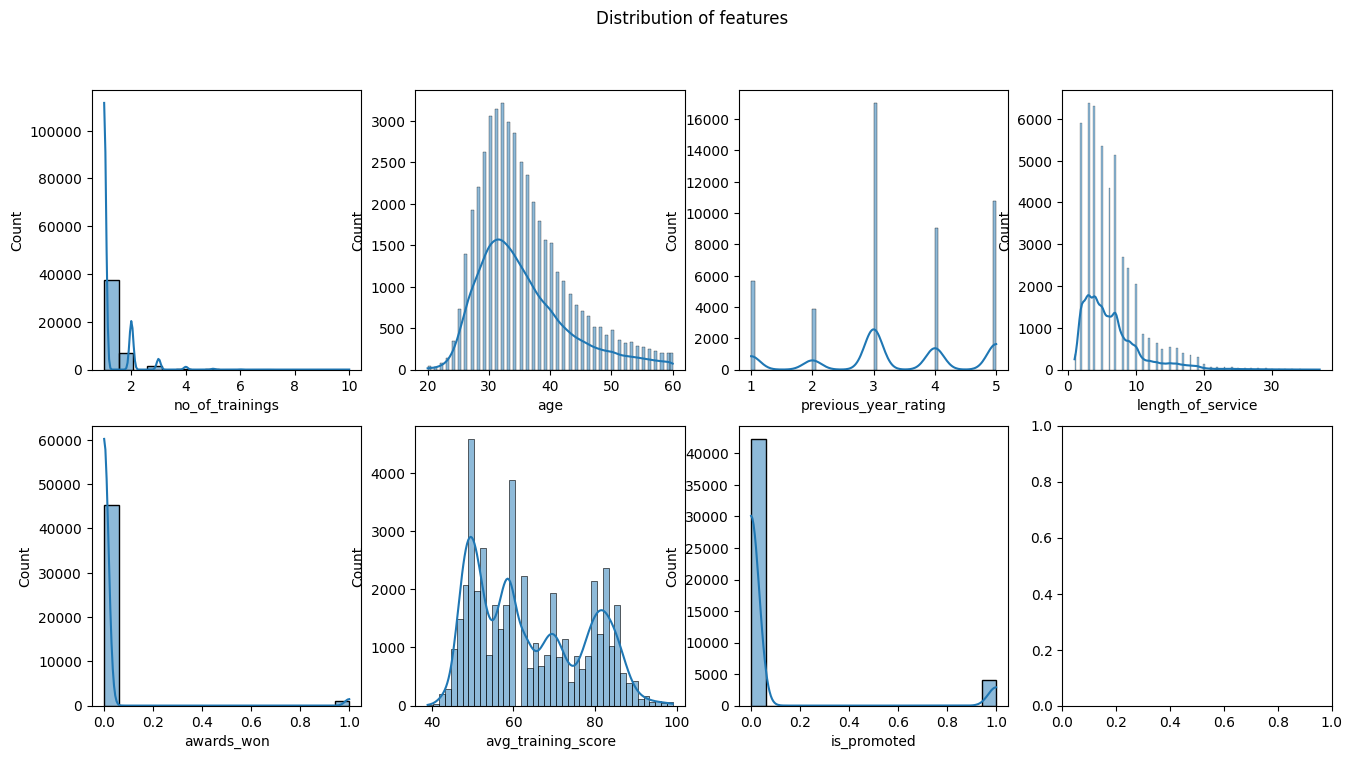

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a subplot grid
num_rows = (len(num_features) - 1) // 4 + 1
fig, axs = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))

for i, column in enumerate(num_features):
    row = i // 4
    col = i % 4
    sns.histplot(df[column], kde=True, ax=axs[row][col])

# Set a super title for the entire figure
plt.suptitle("Distribution of features")


plt.show()

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

def plot_curve(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()

    plt.subplot(1, 2, 2)
    if df[feature].dtype in [int, float]:
        stats.probplot(df[feature], dist='norm', plot=pylab)
    else:
        print(f"Probability plot cannot be generated for non-numerical data in feature: {feature}")

    plt.show()


department
Probability plot cannot be generated for non-numerical data in feature: department


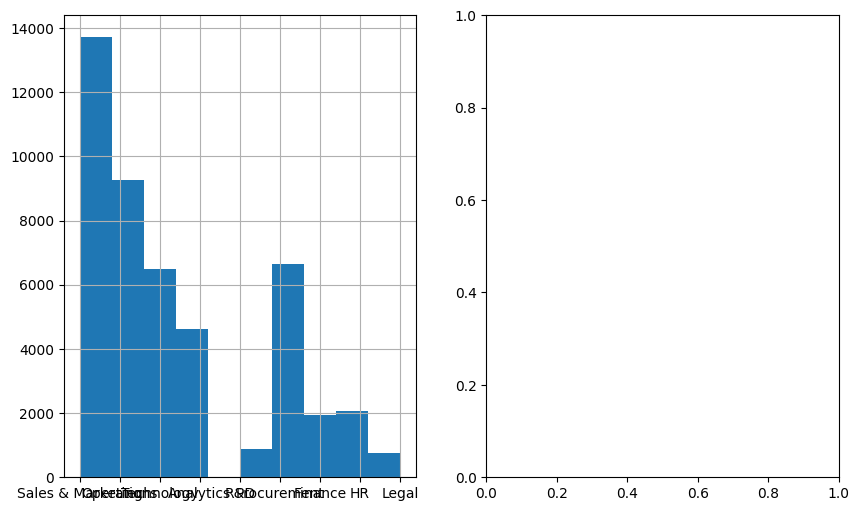

region
Probability plot cannot be generated for non-numerical data in feature: region


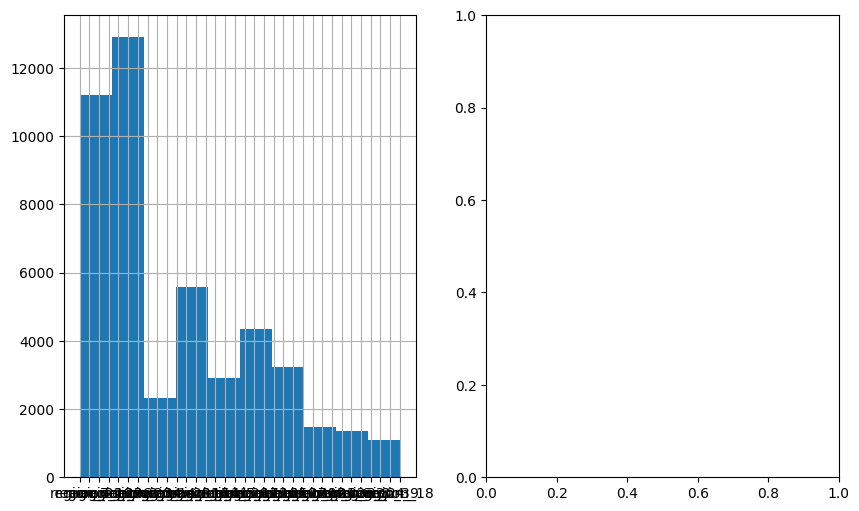

education
Probability plot cannot be generated for non-numerical data in feature: education


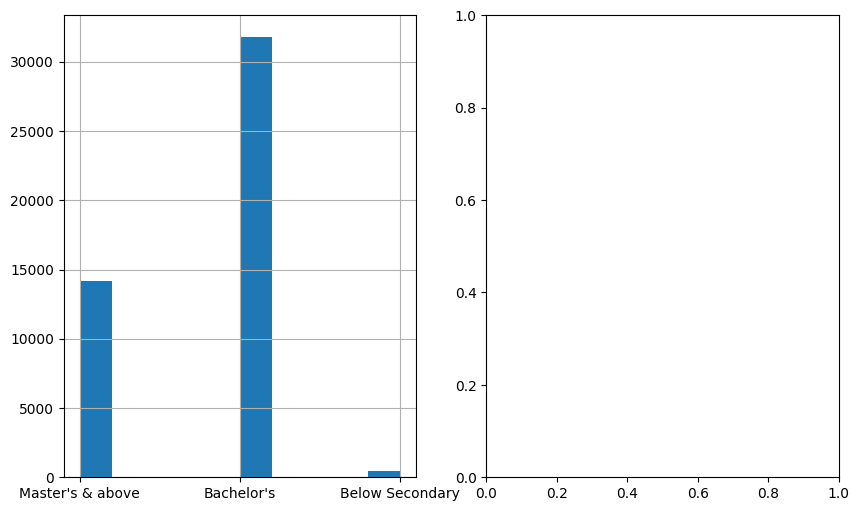

gender
Probability plot cannot be generated for non-numerical data in feature: gender


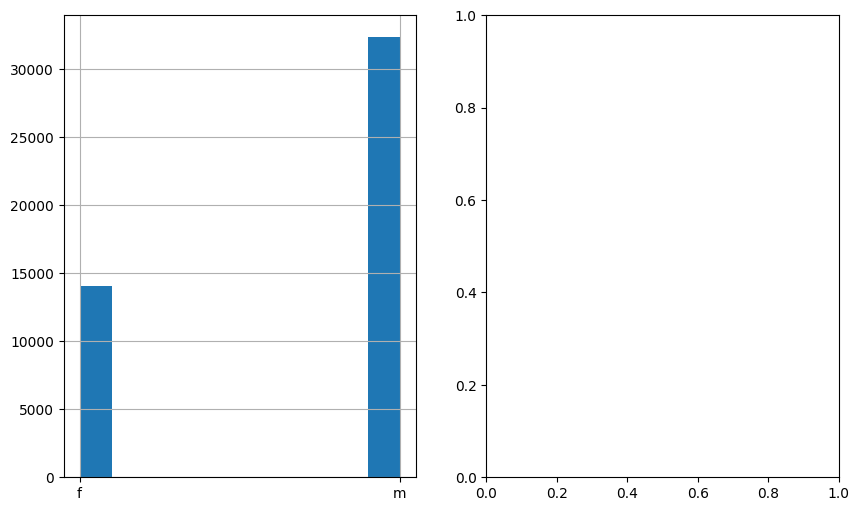

recruitment_channel
Probability plot cannot be generated for non-numerical data in feature: recruitment_channel


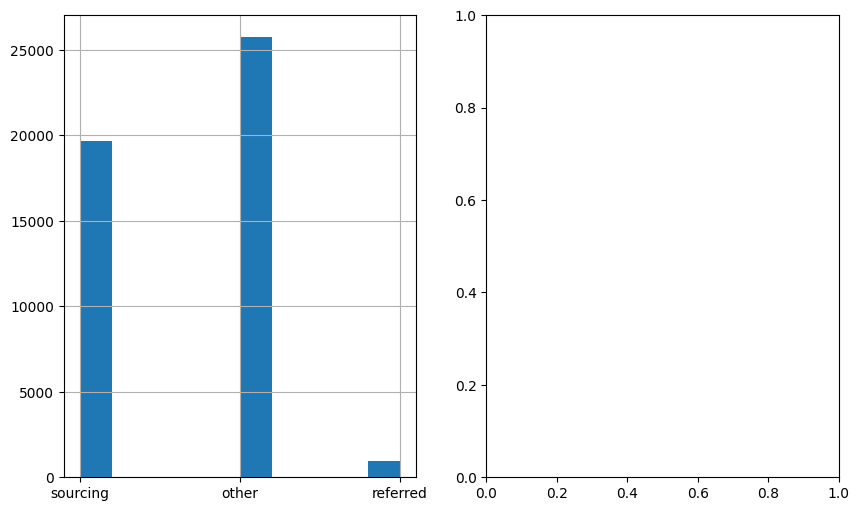

no_of_trainings


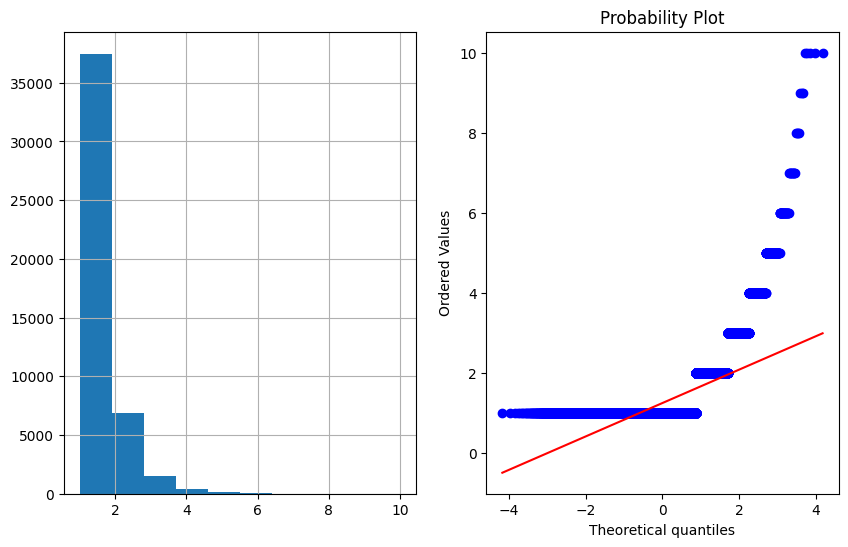

age


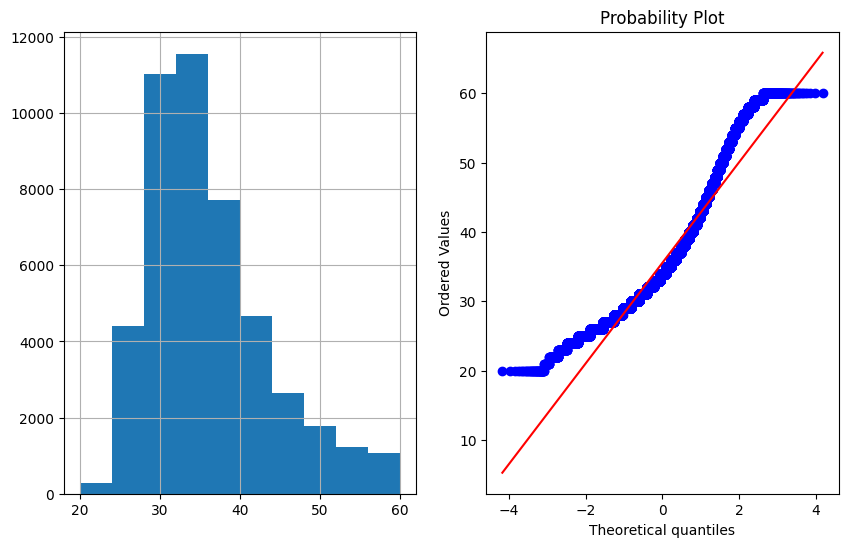

previous_year_rating


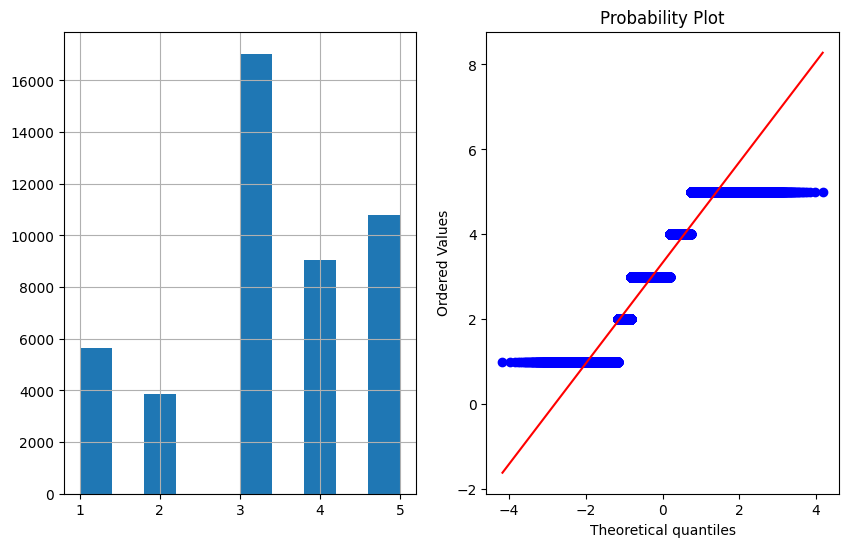

length_of_service


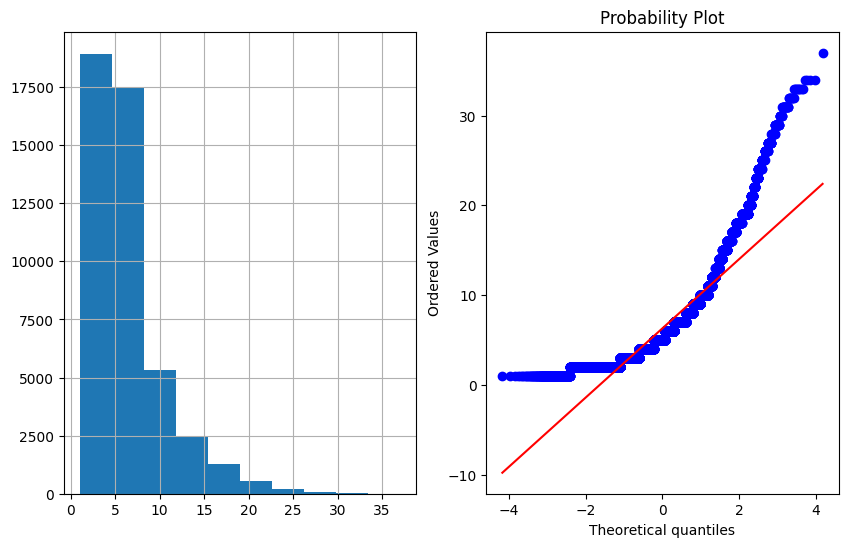

awards_won


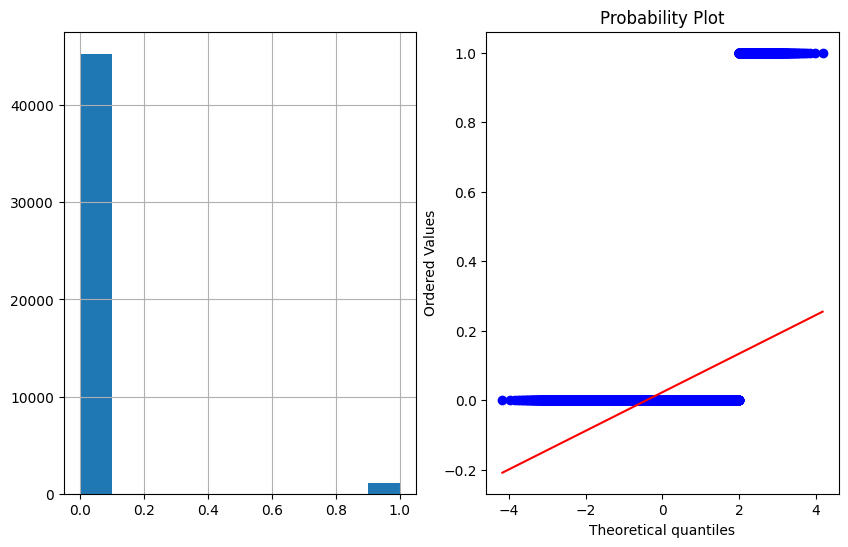

avg_training_score


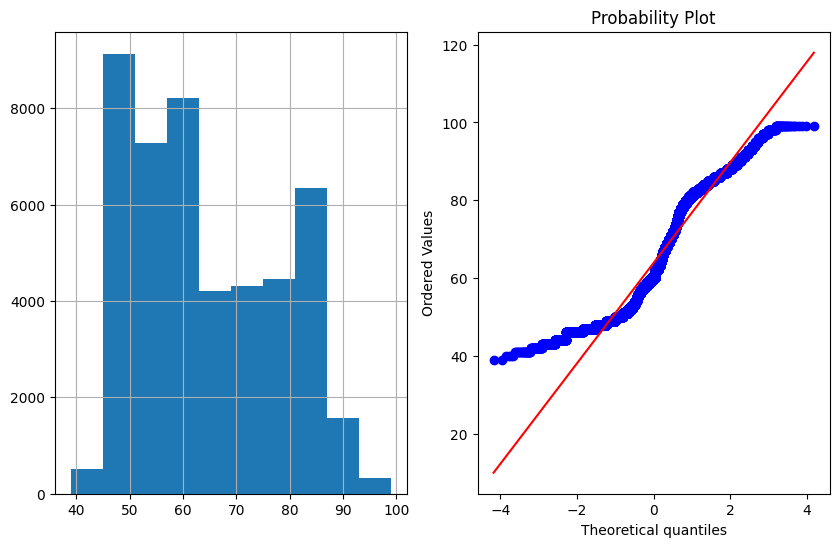

is_promoted


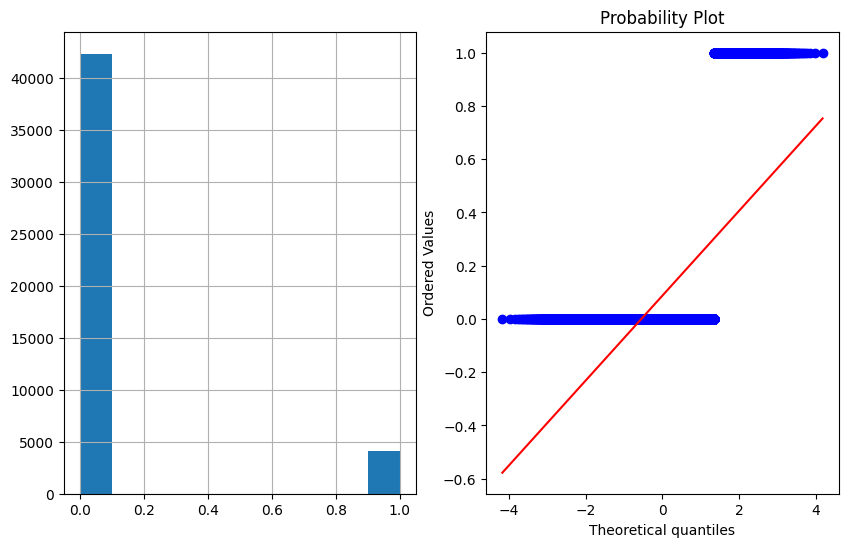

In [ ]:
for feature in df.columns:
    print(feature)
    plot_curve(df,feature)


In [ ]:
age_log = np.log1p(df['age'])
service_log = np.log1p(df['length_of_service'])
score_log = np.log1p(df['avg_training_score'])

df.insert(6, 'age_log', age_log)
df.insert(9, 'length_of_service_log', service_log)
df.insert(12, 'avg_training_score_log', score_log)

df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0


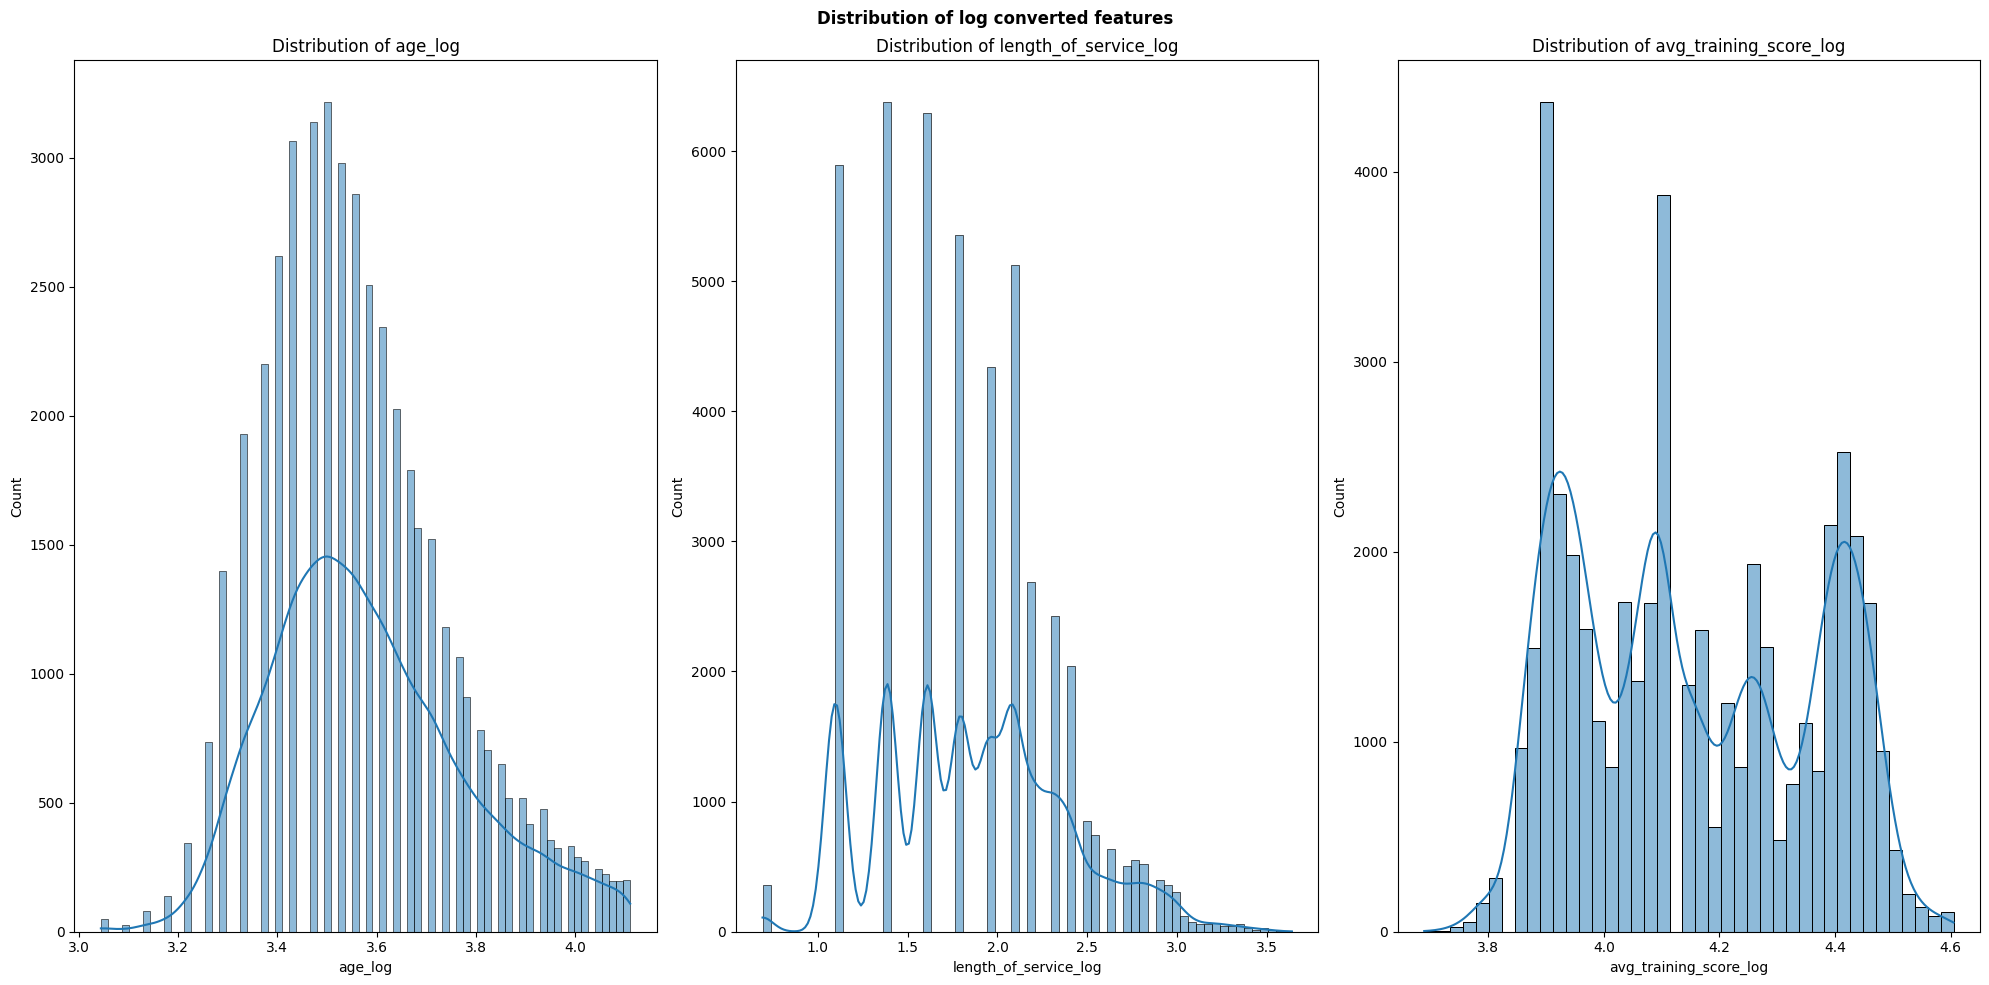

In [ ]:
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.histplot(df['age_log'], ax=ax1,kde="False")
ax1.set_title('Distribution of age_log')
sns.histplot(df['length_of_service_log'], ax=ax2,kde="False")
ax2.set_title('Distribution of length_of_service_log')
sns.histplot(df['avg_training_score_log'], ax=ax3,kde="False")
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

age_log


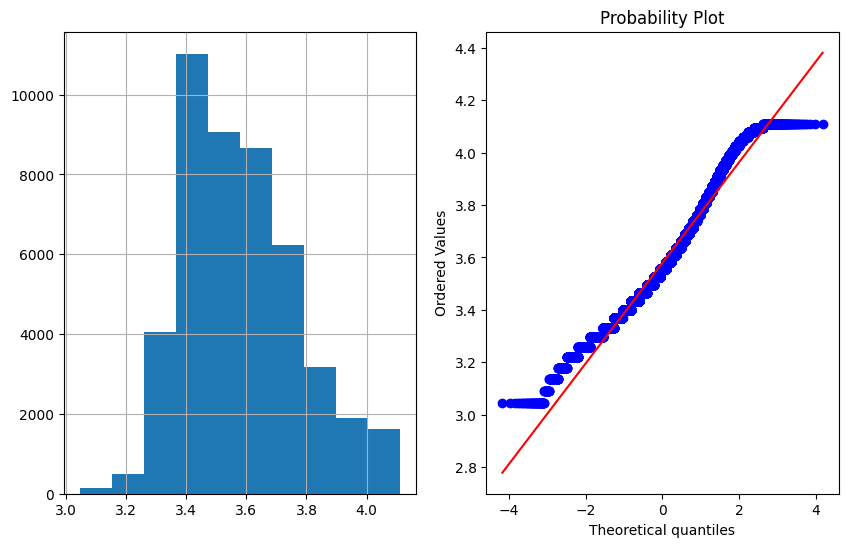

length_of_service_log


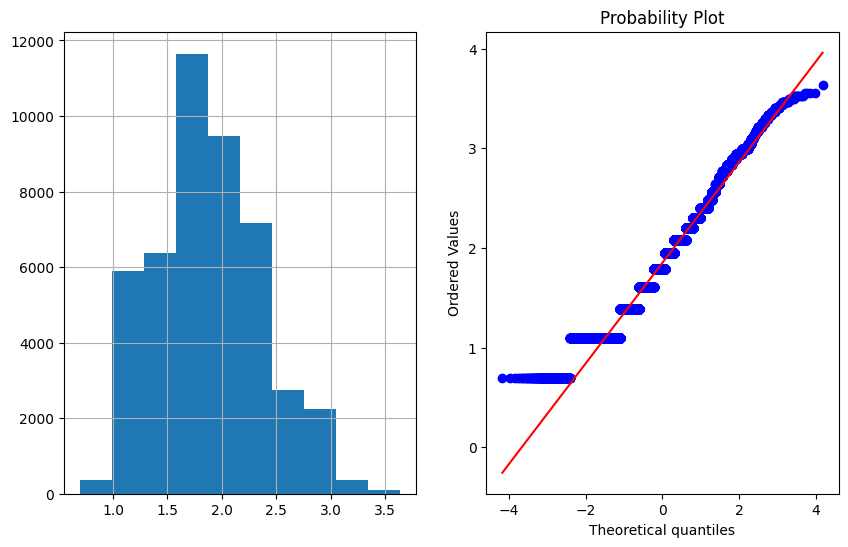

avg_training_score_log


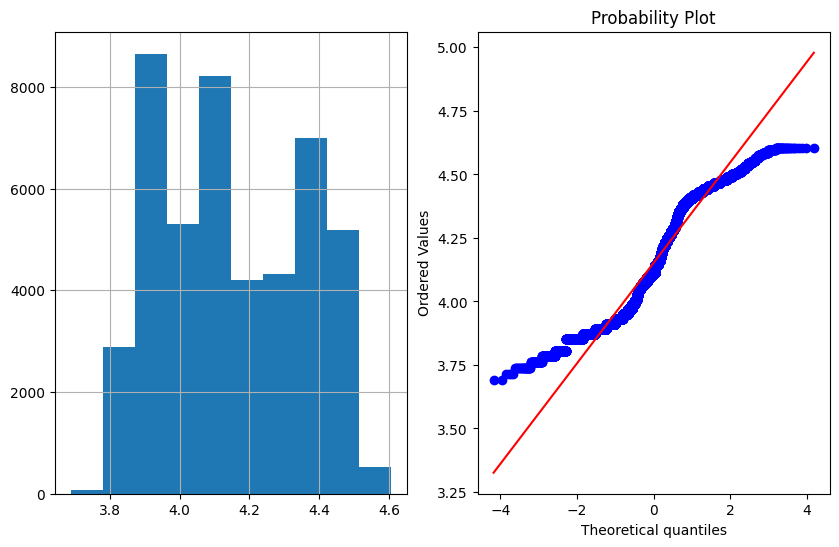

In [ ]:
for feature in log_columns:
    print(feature)
    plot_curve(df,feature)

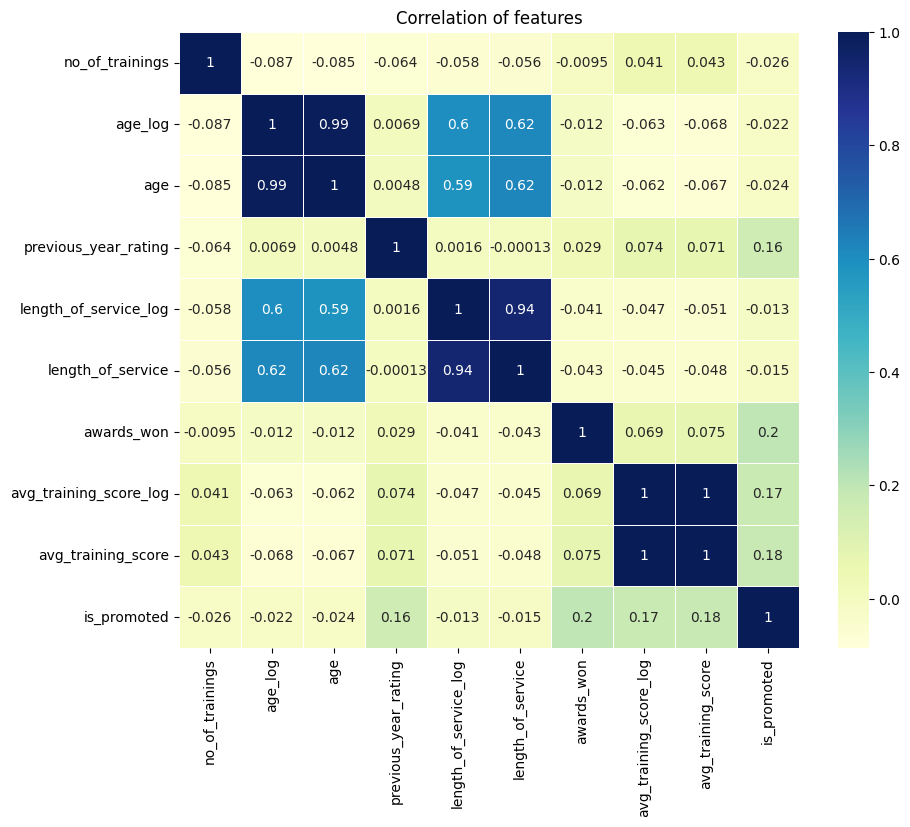

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=['number'])

# Creating a correlation heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(numeric_columns.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df)#provides a 0-1 dataframe for the attributes
df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,3.583519,35,5.0,2.197225,8,0,3.912023,49.0,0,...,False,False,False,False,True,True,False,False,False,True
1,1,3.433987,30,5.0,1.609438,4,0,4.110874,60.0,0,...,False,False,True,False,False,False,True,True,False,False
2,1,3.555348,34,3.0,2.079442,7,0,3.931826,50.0,0,...,False,False,True,False,False,False,True,False,False,True
3,2,3.688879,39,1.0,2.397895,10,0,3.931826,50.0,0,...,False,False,True,False,False,False,True,True,False,False
4,1,3.828641,45,3.0,1.098612,2,0,4.304065,73.0,0,...,False,False,True,False,False,False,True,True,False,False


In [ ]:
from sklearn.preprocessing import StandardScaler
features = np.array(df_encoded.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(df_encoded[feature])
    df_encoded[feature] = scaler.transform(df_encoded[feature])

df_encoded.head()

,no_of_trainings,age_log,age,previous_year_rating,length_of_service_log,length_of_service,awards_won,avg_training_score_log,avg_training_score,is_promoted,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,0.019377,-0.076052,1.324653,0.673784,0.402667,-0.155136,-1.177045,-1.111888,-0.310195,...,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,1.518245,-1.518245,-1.117074,-0.146768,1.166064
1,-0.418611,-0.749600,-0.740379,1.324653,-0.474482,-0.549239,-0.155136,-0.202848,-0.292548,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
2,-0.418611,-0.125493,-0.208918,-0.263965,0.443690,0.164690,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,-1.117074,-0.146768,1.166064
3,1.226184,0.561202,0.455409,-1.852582,1.065803,0.878619,-0.155136,-1.080029,-1.037403,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586
4,-0.418611,1.279937,1.252601,-0.263965,-1.472401,-1.025192,-0.155136,0.743621,0.675764,-0.310195,...,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-0.658655,0.658655,0.895195,-0.146768,-0.857586


In [ ]:
x = df_encoded.drop(columns=['is_promoted'], inplace=False)
y = df_encoded['is_promoted'].astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)#80:20 ratio

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 60)
Shape of X_test:  (9276, 60)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


In [ ]:
from sklearn.metrics import accuracy_score,  precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")

    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, dt_pred, dt_pred_proba)

NameError: name 'recall_score' is not defined

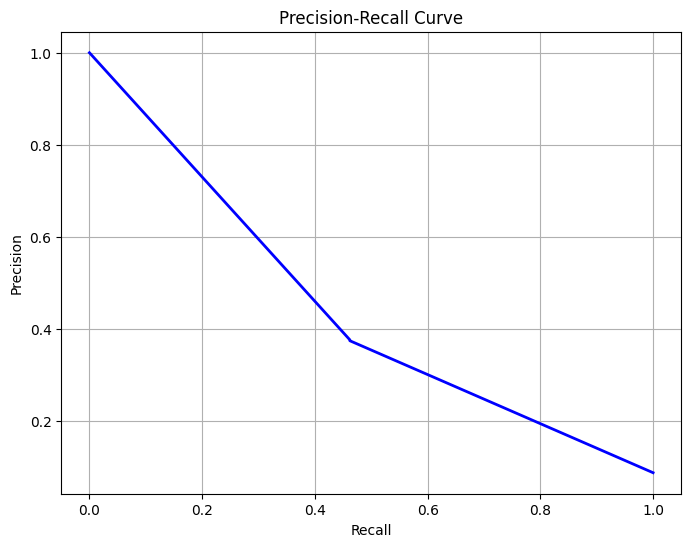

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have a trained classifier 'dt_clf' and test data 'X_test', 'y_test'
y_scores = dt_clf.predict_proba(X_test)[:, 1]  # Get the probability scores for the positive class

# Specify the positive label if it's not 1
precision, recall, _ = precision_recall_curve(y_test, y_scores, pos_label=3)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [ ]:
lr_clf = LogisticRegression()

In [ ]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[7304   18]
 [ 453  225]]
Accuracy: 0.9411, Precision: 0.9338, Recall 0.6647, F1: 0.7287


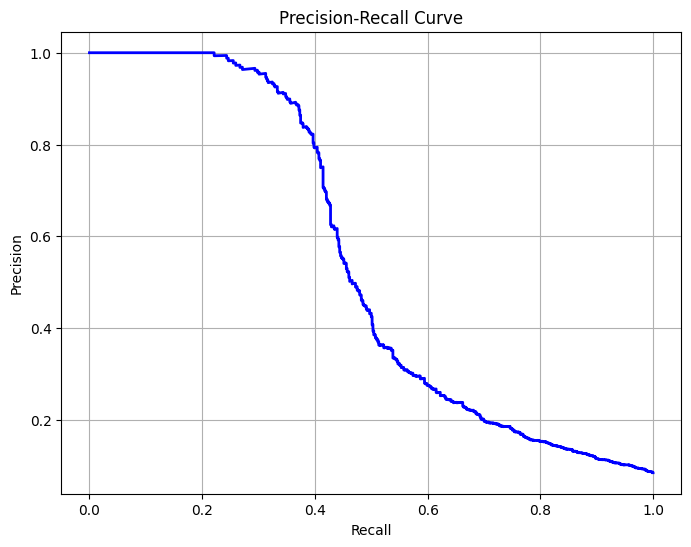

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have a trained classifier 'dt_clf' and test data 'X_test', 'y_test'
y_scores = lr_clf.predict_proba(X_test)[:, 1]  # Get the probability scores for the positive class

# Specify the positive label if it's not 1
precision, recall, _ = precision_recall_curve(y_test, y_scores, pos_label=3)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[7296   26]
 [ 452  226]]
Accuracy: 0.9403, Precision: 0.9192, Recall 0.6649, F1: 0.7272


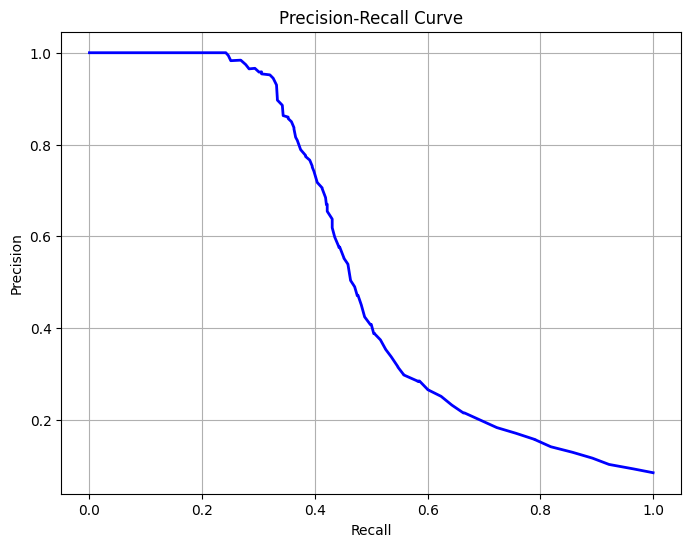

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have a trained classifier 'dt_clf' and test data 'X_test', 'y_test'
y_scores = rf_clf.predict_proba(X_test)[:, 1]  # Get the probability scores for the positive class

# Specify the positive label if it's not 1
precision, recall, _ = precision_recall_curve(y_test, y_scores, pos_label=3)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


NameError: name 'df' is not defined

IMPLEMENTATION OF KMEANS



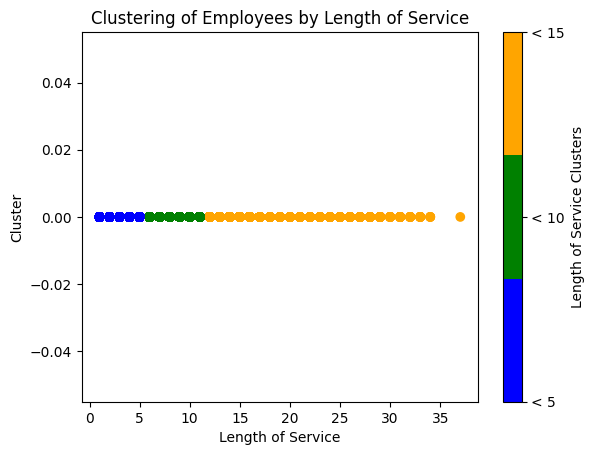

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class K_Means:

    def __init__(self, k=3, tolerance=0.001, max_iter=500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance

    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def fit(self, data):
        self.centroids = {}
        # Initialize centroids for each cluster
        self.centroids[0] = np.array([2.5])  # Cluster for service duration less than 5 years
        self.centroids[1] = np.array([7.5])  # Cluster for service duration less than 10 years
        self.centroids[2] = np.array([12.5])  # Cluster for service duration less than 15 years

        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []

            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point, self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis=0)

            isOptimal = True

            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid) / original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break


# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/employee_promotion.csv")

# Create an instance of the K_Means class
k_means = K_Means(k=3)  # Set the number of clusters (k) as desired

# Fit the model with the length of service data
k_means.fit(df["length_of_service"].values.reshape(-1, 1))  # Reshape data to 2D array if needed

# Predict the clusters for each employee based on their length of service
df['cluster'] = [k_means.predict(np.array([[length_of_service]])) for length_of_service in df["length_of_service"]]

# Define custom colormap
cmap = ListedColormap(['blue', 'green', 'orange'])

# Visualize the clusters with legend
plt.scatter(df["length_of_service"], np.zeros_like(df["length_of_service"]), c=df['cluster'], cmap=cmap)
plt.xlabel('Length of Service')
plt.ylabel('Cluster')
plt.title('Clustering of Employees by Length of Service')
plt.colorbar(ticks=[0, 1, 2], label='Length of Service Clusters', format=plt.FuncFormatter(lambda val, loc: ['< 5', '< 10', '< 15'][val]))
plt.show()


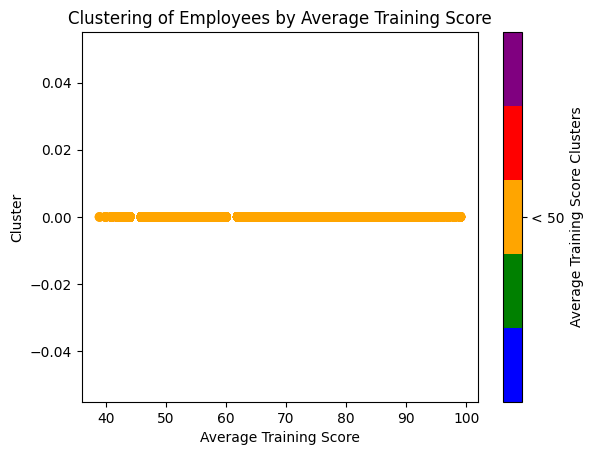

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class K_Means:

  def __init__(self, k=5, tolerance=0.001, max_iter=500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance

  def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)

  def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
  def fit(self, data):
    self.centroids = {}
    # Initialize centroids for each cluster
    self.centroids[0] = np.array([25])   # Cluster for average training score less than 50
    self.centroids[1] = np.array([55])   # Cluster for average training score less than 60
    self.centroids[2] = np.array([65])   # Cluster for average training score less than 70
    self.centroids[3] = np.array([75])   # Cluster for average training score less than 80
    self.centroids[4] = np.array([85])   # Cluster for average training score less than 90

    for i in range(self.max_iterations):
        self.classes = {}
        for j in range(self.k):
            self.classes[j] = []

        for point in data:
            distances = []
            for index in self.centroids:
                distances.append(self.euclidean_distance(point, self.centroids[index]))
            cluster_index = distances.index(min(distances))
            self.classes[cluster_index].append(point)

        previous = dict(self.centroids)
        for cluster_index in self.classes:
            if len(self.classes[cluster_index]) > 0:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis=0)
            else:
                # Reinitialize the centroid randomly or assign it the centroid of the nearest non-empty cluster
                pass  # Implement your solution here

        isOptimal = True

        for centroid in self.centroids:
            original_centroid = previous[centroid]
            curr = self.centroids[centroid]
            if np.sum((curr - original_centroid) / original_centroid * 100.0) > self.tolerance:
                isOptimal = False
        if isOptimal:
            break




# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/employee_promotion.csv")

# Create an instance of the K_Means class
k_means = K_Means(k=5)  # Set the number of clusters (k) as desired

# Fit the model with the average training score data
k_means.fit(df["avg_training_score"].values.reshape(-1, 1))  # Reshape data to 2D array if needed

# Predict the clusters for each employee based on their average training score
df['cluster_avg_training_score'] = [k_means.predict(np.array([[avg_training_score]])) for avg_training_score in df["avg_training_score"]]

# Define custom colormap
cmap = ListedColormap(['blue', 'green', 'orange', 'red', 'purple'])

# Visualize the clusters with legend
plt.scatter(df["avg_training_score"], np.zeros_like(df["avg_training_score"]), c=df['cluster_avg_training_score'], cmap=cmap)
plt.xlabel('Average Training Score')
plt.ylabel('Cluster')
plt.title('Clustering of Employees by Average Training Score')
plt.colorbar(ticks=[0, 1, 2, 3, 4], label='Average Training Score Clusters', format=plt.FuncFormatter(lambda val, loc: ['< 50', '< 60', '< 70', '< 80', '< 90'][val]))
plt.show()


In [ ]:
!pip install evalml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━